<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/KMeansClustering_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Retail_Business/clustering_shoppingmall.csv")

In [ ]:
# Performing preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   Expense_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()


,CustomerID,Gender,Age,Income,Expense_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Expense_score,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Performing EDA

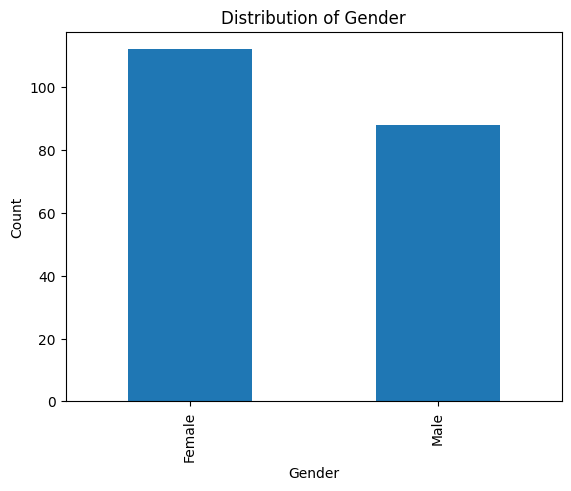

In [ ]:
# Distribution of categorical feature 'Gender'
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


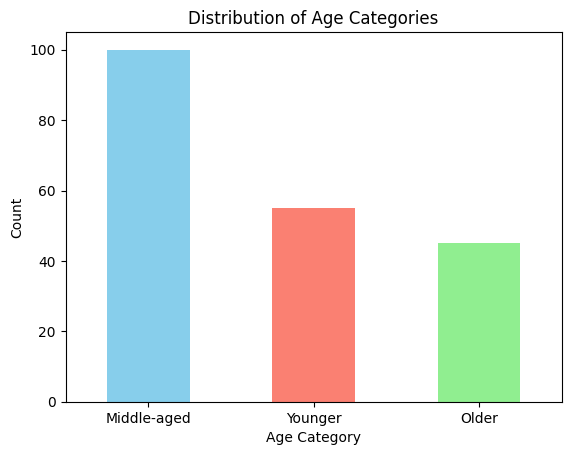

Age_Category
Middle-aged    100
Younger         55
Older           45
Name: count, dtype: int64


In [ ]:
# Define age categories
def categorize_age(age):
    if age < 30:
        return 'Younger'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Older'

# Apply the categorization function
df['Age_Category'] = df['Age'].apply(categorize_age)

# Plot distribution of age categories
df['Age_Category'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display counts of each age category
print(df['Age_Category'].value_counts())


<ipython-input-58-864daac63e3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Category', y='Expense_score', data=df, palette='Set2')


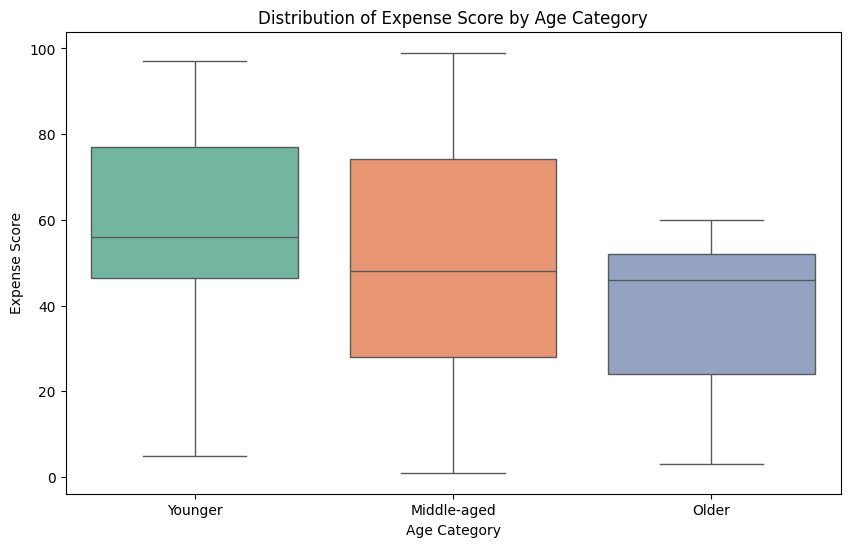

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Expense_score by Age Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Category', y='Expense_score', data=df, palette='Set2')
plt.title('Distribution of Expense Score by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Expense Score')
plt.show()


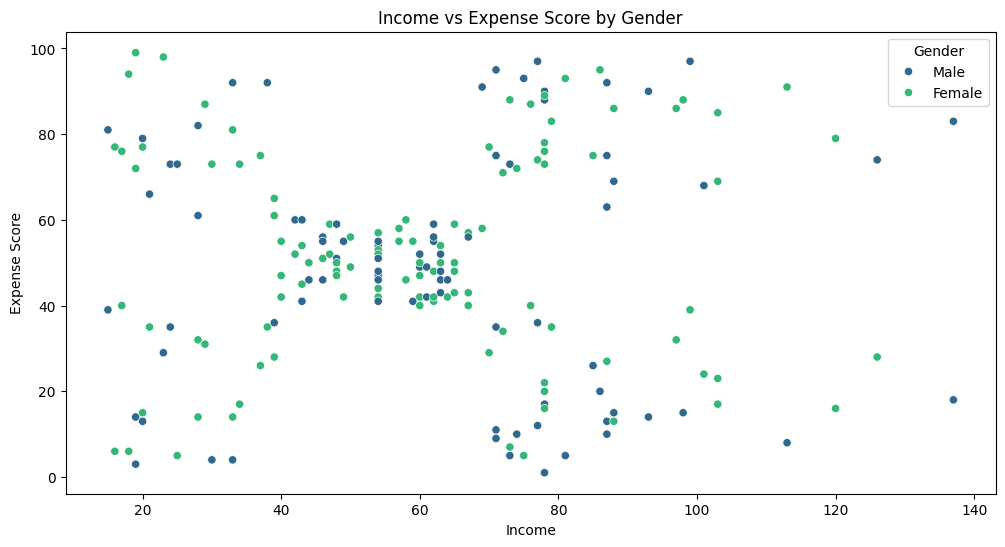

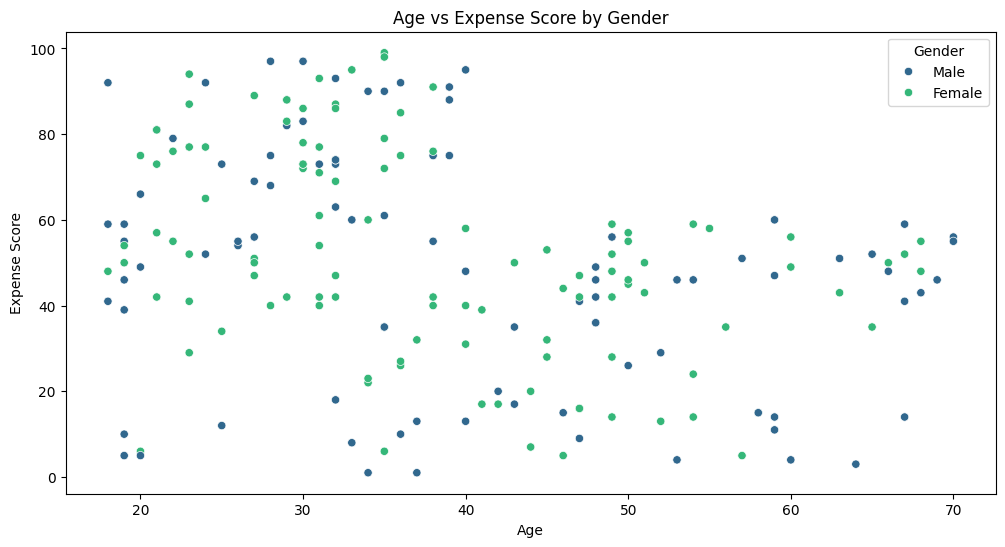

In [ ]:
# Scatter plot of Income vs Expense Score, colored by Gender
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Income', y='Expense_score', hue='Gender', palette='viridis', data=df)
plt.title('Income vs Expense Score by Gender')
plt.xlabel('Income')
plt.ylabel('Expense Score')
plt.legend(title='Gender')
plt.show()

# Scatter plot of Age vs Expense Score, colored by Gender
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Expense_score', hue='Gender', palette='viridis', data=df)
plt.title('Age vs Expense Score by Gender')
plt.xlabel('Age')
plt.ylabel('Expense Score')
plt.legend(title='Gender')
plt.show()


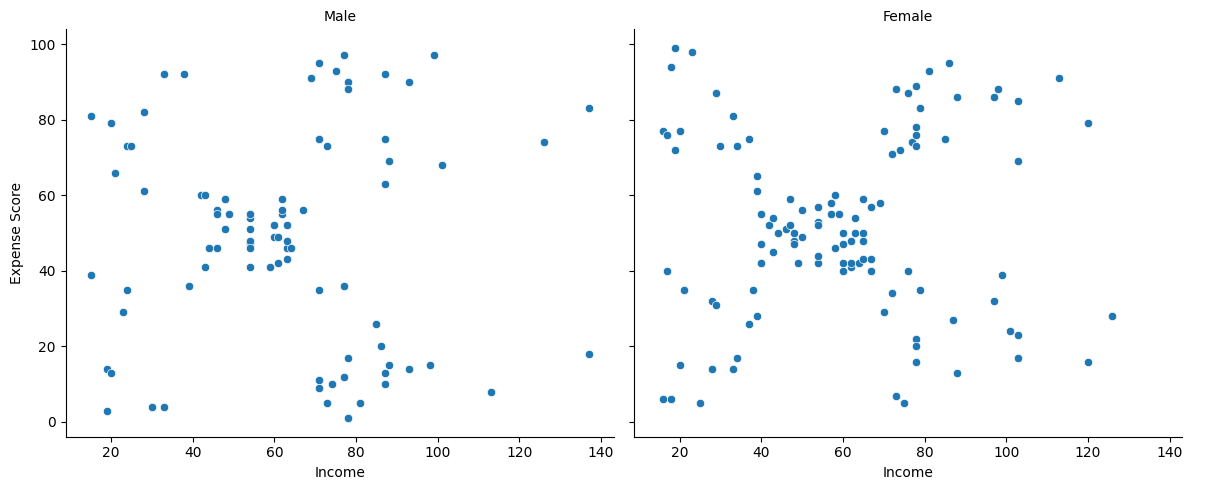

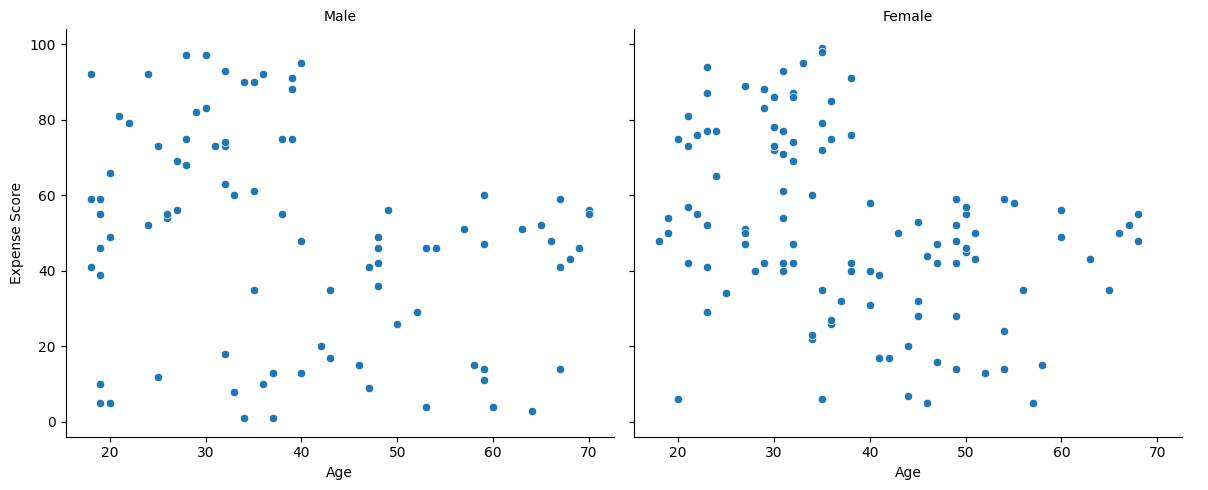

In [ ]:
# FacetGrid for Income vs Expense Score by Gender
g = sns.FacetGrid(df, col='Gender', height=5, aspect=1.2)
g.map(sns.scatterplot, 'Income', 'Expense_score')
g.set_axis_labels('Income', 'Expense Score')
g.set_titles(col_template='{col_name}')
g.add_legend()
plt.show()

# FacetGrid for Age vs Expense Score by Gender
g = sns.FacetGrid(df, col='Gender', height=5, aspect=1.2)
g.map(sns.scatterplot, 'Age', 'Expense_score')
g.set_axis_labels('Age', 'Expense Score')
g.set_titles(col_template='{col_name}')
g.add_legend()
plt.show()


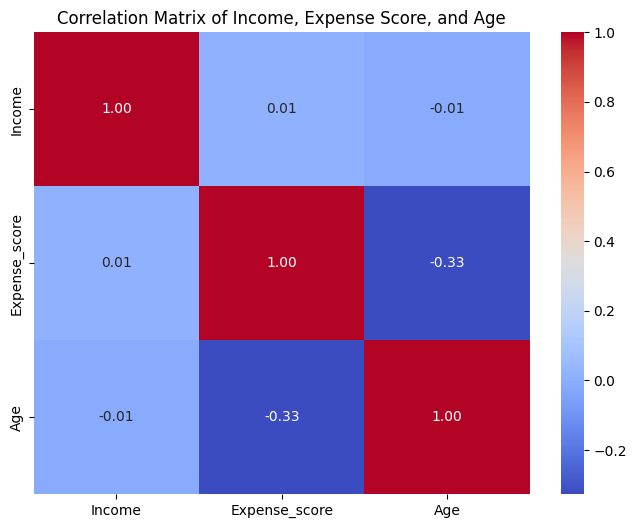

In [ ]:
# Correlation matrix for all features
corr_matrix = df[['Income', 'Expense_score', 'Age']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Income, Expense Score, and Age')
plt.show()


In [ ]:
# Step 1: Select the features to include (Age, Income, Expense_score)
X = df[['Age', 'Income', 'Expense_score']].values

# Step 2: Apply K-Means clustering
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named 'label'
df["label"] = y_pred

# displaying the first few rows of the DataFrame
df.head()


,CustomerID,Gender,Age,Income,Expense_score,Age_Category,label
0,1,Male,19,15,39,Younger,0
1,2,Male,21,15,81,Younger,3
2,3,Female,20,16,6,Younger,0
3,4,Female,23,16,77,Younger,3
4,5,Female,31,17,40,Middle-aged,0


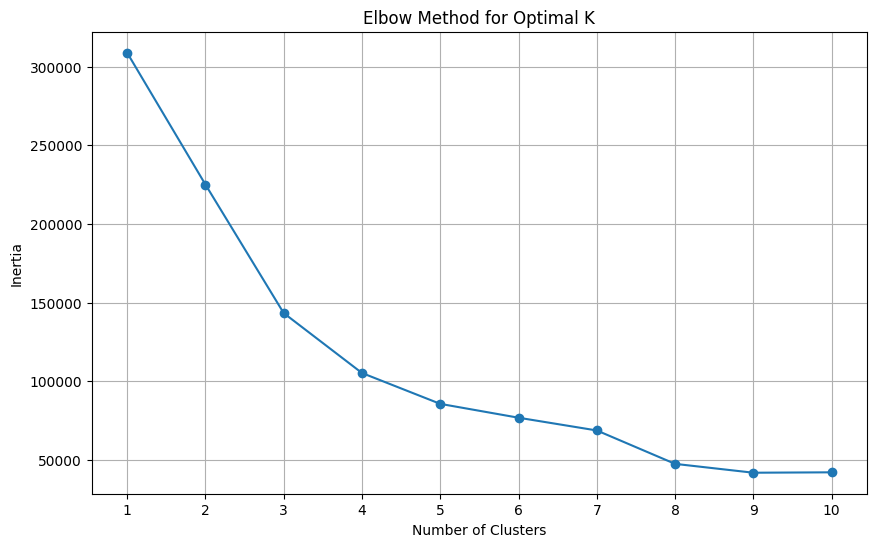

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Step 1: Initialize a list to hold the inertia values
inertia = []

# Step 2: Fit KMeans for a range of cluster numbers
cluster_range = range(1, 11)  # You can adjust the range as needed
for n_clusters in cluster_range:
    k_means = KMeans(n_clusters=n_clusters, n_init="auto")
    k_means.fit(X)
    inertia.append(k_means.inertia_)

# Step 3: Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()


Silhouette Score: 0.43980833648377404
   CustomerID  Gender  Age  Income  Expense_score Age_Category  label  Cluster
0           1    Male   19      15             39      Younger      0        0
1           2    Male   21      15             81      Younger      3        3
2           3  Female   20      16              6      Younger      0        0
3           4  Female   23      16             77      Younger      3        3
4           5  Female   31      17             40  Middle-aged      0        0


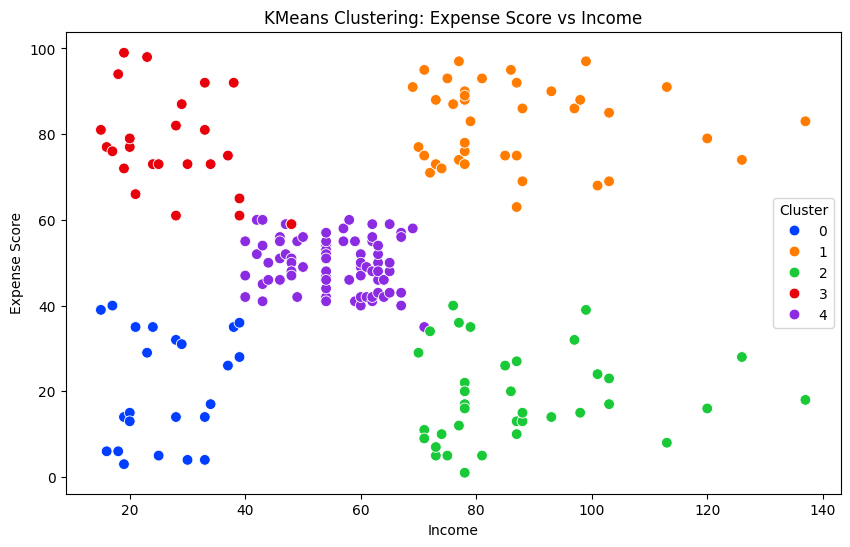

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select the relevant features
X = df[['Age', 'Income', 'Expense_score']]

# Step 2: Initialize KMeans
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# Step 3: Fit the model
k_means_1.fit(X)

# Step 4: Predict the labels
y_pred = k_means_1.predict(X)

# Step 5: Calculate the silhouette score
silhouette_avg = silhouette_score(X, y_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Step 6: Remove the numeric label column if it exists (optional)
if 'label_numeric' in df.columns:
    df.drop(columns=['label_numeric'], inplace=True)

# Step 7: Add the new labels to the DataFrame
df['Cluster'] = y_pred  # Changed from 'label' to 'Cluster'

# Show the updated DataFrame
print(df.head())

# Optional: Visualize the clusters
# Define a color palette (5 clusters, so 5 colors)
colors = sns.color_palette('bright', n_colors=5)

# Create a scatter plot of Income vs Expense Score, color-coded by cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Income',
    y='Expense_score',
    hue='Cluster',  # Changed from 'label' to 'Cluster'
    palette=colors,
    data=df,
    s=60
)

plt.xlabel('Income')
plt.ylabel('Expense Score')
plt.title('KMeans Clustering: Expense Score vs Income')
plt.show()


   Customer Id  Gender  Age  Income  Expense_score
0            1    Male   19      12              6
1            2  Female   30      27             30
2            3  Female   32      29             20
3            4    Male   35      30             18
4            5  Female   50      45             24
   Customer Id  Gender  Age  Income  Expense_score  Cluster
0            1    Male   19      12              6        2
1            2  Female   30      27             30        0
2            3  Female   32      29             20        0
3            4    Male   35      30             18        0
4            5  Female   50      45             24        1
Silhouette Score for 4 clusters (Test Data): 0.42439510573645967


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


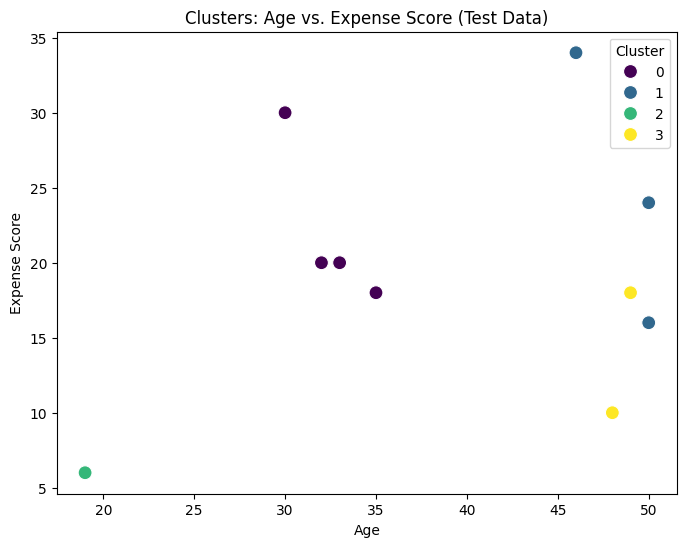

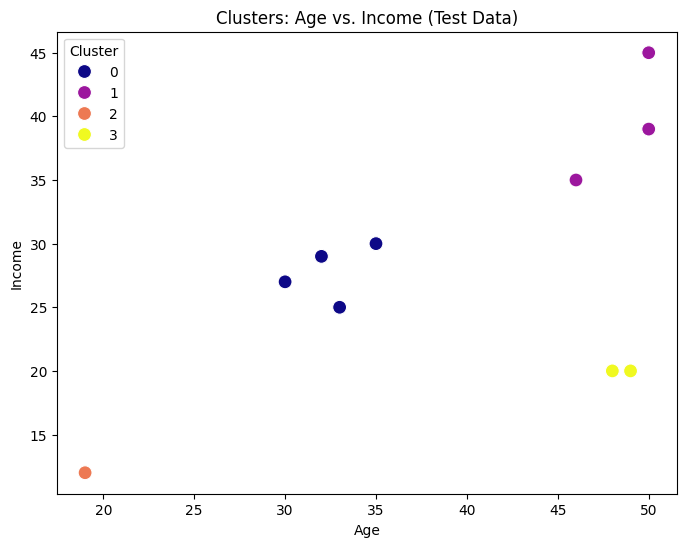

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = '/content/drive/MyDrive/Retail_Business/testdataset (1).csv'  # Path to the uploaded dataset
test_df = pd.read_csv(file_path)

# Drop 'CustomerID' column (if it exists)
if 'CustomerID' in test_df.columns:
    test_df = test_df.drop(columns=['CustomerID'])

# Inspect the dataset to ensure 'CustomerID' is dropped
print(test_df.head())

# Selecting relevant features for clustering
X_test = test_df[['Age', 'Expense_score', 'Income']]  # Ensure the necessary columns are available

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Applying KMeans with 4 clusters (based on previous elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
test_clusters = kmeans.fit_predict(X_test_scaled)

# Adding the cluster labels to the test dataset
test_df['Cluster'] = test_clusters

# Inspect the dataset with the new 'Cluster' column
print(test_df.head())

# Calculating Silhouette Score for the optimal number of clusters
sil_score_test = silhouette_score(X_test_scaled, test_clusters)
print(f'Silhouette Score for {optimal_k} clusters (Test Data): {sil_score_test}')

# Plotting clusters (scatter plot for 'Age' vs 'Expense_score')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Expense_score', hue='Cluster', data=test_df, palette='viridis', s=100, legend='full')
plt.title('Clusters: Age vs. Expense Score (Test Data)')
plt.xlabel('Age')
plt.ylabel('Expense Score')
plt.show()

# Plotting clusters (scatter plot for 'Age' vs 'Income')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=test_df, palette='plasma', s=100, legend='full')
plt.title('Clusters: Age vs. Income (Test Data)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


In [ ]:
test_df.tail()

,Customer Id,Gender,Age,Income,Expense_score,Cluster
5,6,Male,33,25,20,0
6,7,Male,46,35,34,1
7,8,Female,49,20,18,3
8,9,Male,50,39,16,1
9,10,Male,48,20,10,3


Silhouette Score for Training Data: 0.43980833648377404
Silhouette Score for Test Data: 0.45578736573387363


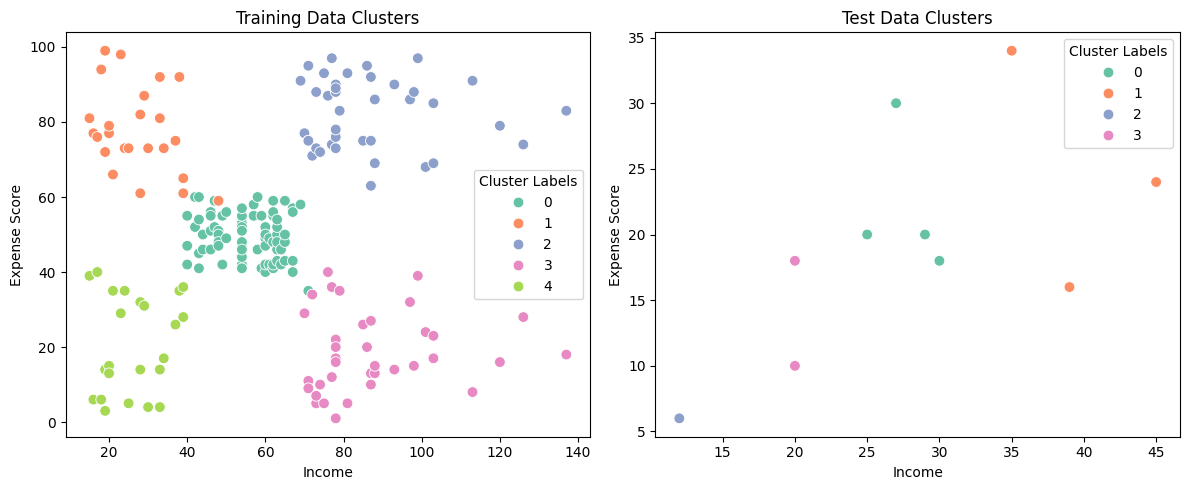


Training Cluster Counts:
Cluster
0    76
1    25
2    39
3    37
4    23
Name: count, dtype: int64

Test Cluster Counts:
Cluster
0    4
1    3
2    1
3    2
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Silhouette Scores
silhouette_train = silhouette_score(df[['Age', 'Income', 'Expense_score']], df['Cluster'])
silhouette_test = silhouette_score(test_df[['Age', 'Income', 'Expense_score']], test_df['Cluster'])

print(f'Silhouette Score for Training Data: {silhouette_train}')
print(f'Silhouette Score for Test Data: {silhouette_test}')

# 2. Visualize Clusters
plt.figure(figsize=(12, 5))

# Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Income',
    y='Expense_score',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=60
)
plt.xlabel('Income')
plt.ylabel('Expense Score')
plt.title('Training Data Clusters')
plt.legend(title='Cluster Labels')

# Test Data
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Income',
    y='Expense_score',
    hue='Cluster',
    palette='Set2',
    data=test_df,
    s=60
)
plt.xlabel('Income')
plt.ylabel('Expense Score')
plt.title('Test Data Clusters')
plt.legend(title='Cluster Labels')

plt.tight_layout()
plt.show()

# 3. Analyze Cluster Overlap
# Count how many clusters from test match the clusters in training
train_cluster_counts = df['Cluster'].value_counts().sort_index()
test_cluster_counts = test_df['Cluster'].value_counts().sort_index()

print("\nTraining Cluster Counts:")
print(train_cluster_counts)

print("\nTest Cluster Counts:")
print(test_cluster_counts)


In [ ]:
# Aggregate for Training Data
train_aggregate = df.groupby('Cluster').agg(
    Count=('Cluster', 'size'),
    Mean_Age=('Age', 'mean'),
    Mean_Income=('Income', 'mean'),
    Mean_Expense_Score=('Expense_score', 'mean')
).reset_index()

print("Training Data Aggregate:")
print(train_aggregate)

# Aggregate for Test Data
test_aggregate = test_df.groupby('Cluster').agg(
    Count=('Cluster', 'size'),
    Mean_Age=('Age', 'mean'),
    Mean_Income=('Income', 'mean'),
    Mean_Expense_Score=('Expense_score', 'mean')
).reset_index()

print("\nTest Data Aggregate:")
print(test_aggregate)


Training Data Aggregate:
   Cluster  Count   Mean_Age  Mean_Income  Mean_Expense_Score
0        0     76  43.934211    55.210526           49.447368
1        1     25  24.960000    28.040000           77.000000
2        2     39  32.692308    86.538462           82.128205
3        3     37  40.324324    87.432432           18.189189
4        4     23  45.217391    26.304348           20.913043

Test Data Aggregate:
   Cluster  Count   Mean_Age  Mean_Income  Mean_Expense_Score
0        0      4  32.500000    27.750000           22.000000
1        1      3  48.666667    39.666667           24.666667
2        2      1  19.000000    12.000000            6.000000
3        3      2  48.500000    20.000000           14.000000
